In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio


In [20]:
%matplotlib widget

In [21]:
folder='20230824'
ms=2

# Use glob.glob to list all files in the directory with a specific pattern
data_files = glob.glob('/Volumes/PortableSSD/2023_BC/bc002/raw/'+folder+f"/ms{'{:03}'.format(ms)}*_2.mat")
print(data_files)

['/Volumes/PortableSSD/2023_BC/bc002/raw/20230824/ms002mpt001_2.mat', '/Volumes/PortableSSD/2023_BC/bc002/raw/20230824/ms002mpt002_2.mat', '/Volumes/PortableSSD/2023_BC/bc002/raw/20230824/ms002mpt003_2.mat']


In [22]:
dataframes=[]
for file in data_files:
    mat_data=sio.loadmat(file)
    df=pd.DataFrame()
    df['Ct']=mat_data['state'][:,0]
    df['Cr']=mat_data['state'][:,1]
    df['Cr_T/5']=mat_data['state'][:,2]
    df['action']=mat_data['action'][0]
    df['action_abs']=mat_data['action_abs'][0]
    df['reward']=mat_data['reward'][0]
    df['time_action']=mat_data['time_action'][0]
    df['phase_action']=mat_data['phase_action'][0]
    dataframes.append(df)
stacked_df = pd.concat(dataframes, axis=0)

# Reset the index of the stacked DataFrame if needed
stacked_df.reset_index(drop=True, inplace=True)
df=stacked_df

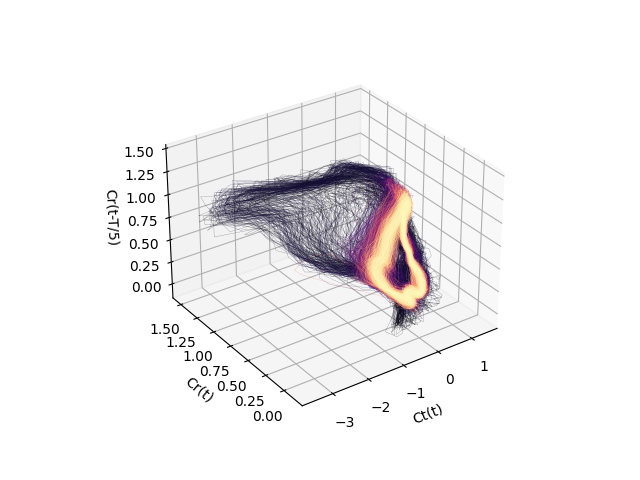

In [23]:

x=df['Ct'].values
y=df['Cr'].values
z=df['Cr_T/5'].values
# Create a figure and a 3D axes object
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
# Create an array of indices
indices = list(range(0,len(x)))
plotlist=[]
# Create a colormap based on the indices
color_map = plt.cm.magma(indices)
for i in range(0,len(x),450):
    # print(int(i/len(x)*255))

    a=ax.plot(x[i:i+450], y[i:i+450], z[i:i+450], color=color_map[int(i/len(x)*255)],linewidth=0.1)
    plotlist.append(a)
ax.view_init(elev=30, azim=235)
ax.set_xlabel('Ct(t)')
ax.set_ylabel('Cr(t)')
ax.set_zlabel('Cr(t-T/5)')
plt.show()
plt.savefig(f"RB_{folder}_ms{'{:03}'.format(ms)}.png",dpi=300)